In [1]:
import pandas as pd
import numpy as np
import os


from alpha.data.underlying import *
from alpha.factor.alpha_101 import *
from alpha.config.config import *

from alpha.eval.eval import *
from alpha.eval.backtest import *
from alpha.eval.attention_plot import *

/home/chencheng/pytorch/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Factor_list

In [2]:
factor_list = ['alphas_101_alpha_035',
               'alphas_101_alpha_038',
               'alphas_101_alpha_040',
               'alphas_101_alpha_043',
               'alphas_101_alpha_045',
               'alphas_101_alpha_049',
               'alphas_101_alpha_051',
               'alphas_101_alpha_053',
               'alphas_101_alpha_055',
               'alphas_101_alpha_060',
               'alphas_101_alpha_085',
               'alphas_101_alpha_001',
               'alphas_101_alpha_002',
               'alphas_101_alpha_003',
               'alphas_101_alpha_004',
               'alphas_101_alpha_006',
               'alphas_101_alpha_007',
               'alphas_101_alpha_008',
               'alphas_101_alpha_009',
               'alphas_101_alpha_010',
               'alphas_101_alpha_012',
               'alphas_101_alpha_013',
               'alphas_101_alpha_014',
               'alphas_101_alpha_015',
               'alphas_101_alpha_016',
               'alphas_101_alpha_017',
               'alphas_101_alpha_018',
               'alphas_101_alpha_019',
               'alphas_101_alpha_020',
               'alphas_101_alpha_021',
               'alphas_101_alpha_022',
               'alphas_101_alpha_023',
               'alphas_101_alpha_024',
               'alphas_101_alpha_026',
               'alphas_101_alpha_028',
               'alphas_101_alpha_029',
               'alphas_101_alpha_030',
               'alphas_101_alpha_031',
               'alphas_101_alpha_033',
               'alphas_101_alpha_034',
               'alphas_101_alpha_037',
               'alphas_101_alpha_039',
               'alphas_101_alpha_044',
               'alphas_101_alpha_046',
               'alphas_101_alpha_052',
               'alphas_101_alpha_054',
               'alphas_101_alpha_068']

### GRU_model

In [3]:
from alpha.model.GRU.scheduler import *
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

/home/chencheng/pytorch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
s_800 = gru_scheduler(name="gru_800",
                      train_len=252*4,
                      valid_len=252,
                      look_back_window=10,
                      factor_list=factor_list,
                      universe_version="zz800",
                      label_df=opn_r,
                      batch_size=1,
                      hidden_size=64,
                      num_layers=1,
                      lr=0.001,
                      weight_decay=0.0001,
                      epochs=50,
                      max_patience=5)
# s_800.train("20210101", "20221231")

In [5]:
loss_800, ic_800, df_800 = s_800.predict("20210101", "20221231")

100%|██████████| 485/485 [00:06<00:00, 78.34it/s]


In [6]:
create_full_tear_sheet(df_800.set_index(["date", "stock_id"]))

{'IC': 0.02064926386114869,
 'Rank IC': 0.018058802516861847,
 'ARR': 0.17066507779271503,
 'AV': 0.04700133680227383,
 'Sharpe': 3.6310685908929003,
 'WR': 0.5942028985507246,
 'MDD': -0.03251233557758304}

### LSTM_model

In [7]:
from alpha.model.LSTM.scheduler import *

In [8]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [10]:
s_800 = lstm_scheduler(name="lstm_800",
                       train_len=252*4,
                       valid_len=252,
                       look_back_window=10,
                       factor_list=factor_list,
                       universe_version="zz800",
                       label_df=opn_r,
                       batch_size=1,
                       hidden_size=64,
                       num_layers=1,
                       lr=0.001,
                       weight_decay=0.0001,
                       epochs=50,
                       max_patience=5)
# s_800.train("20210101", "20221231")

In [11]:
loss_800, ic_800, df_800 = s_800.predict("20210101", "20221231")

100%|██████████| 485/485 [00:04<00:00, 98.24it/s]


In [12]:
create_full_tear_sheet(df_800.set_index(["date", "stock_id"]))

{'IC': 0.022421677764588505,
 'Rank IC': 0.019771354378427187,
 'ARR': 0.18214440305764654,
 'AV': 0.044076609256208016,
 'Sharpe': 4.132450434172003,
 'WR': 0.598343685300207,
 'MDD': -0.02289416696185753}

## Transformer

In [13]:
from alpha.model.Transformer.scheduler import *

In [14]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [15]:
s_800 = transformer_scheduler(name="transformer_800",
                              train_len=252*4,
                              valid_len=252,
                              look_back_window=10,
                              factor_list=factor_list,
                              universe_version="zz800",
                              label_df=opn_r,
                              batch_size=1,
                              hidden_size=128,
                              num_heads=4,
                              lr=0.001,
                              weight_decay=0.0001,
                              epochs=50,
                              max_patience=5)
# s_800.train("20210101", "20221231")

In [16]:
loss_800, ic_800, df_800 = s_800.predict("20210101", "20221231")

100%|██████████| 485/485 [00:05<00:00, 81.92it/s]


In [17]:
create_full_tear_sheet(df_800.set_index(["date", "stock_id"]))

{'IC': 0.0188318598906522,
 'Rank IC': 0.02491314101370782,
 'ARR': 0.17428440479091778,
 'AV': 0.04909893652141294,
 'Sharpe': 3.5496574292379868,
 'WR': 0.6066252587991718,
 'MDD': -0.031436486544623055}

### GCN_model

In [18]:
from alpha.model.LSTM_GCN.scheduler import *

In [19]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [20]:
s_800 = lstm_gcn_scheduler(name="gcn_800",
                           train_len=252*4,
                           valid_len=252,
                           look_back_window=10,
                           factor_list=factor_list,
                           universe_version="zz800",
                           label_df=opn_r,
                           batch_size=1,
                           hidden_size=64,
                           out_features=64,
                           num_layers=1,
                           lr=0.001,
                           weight_decay=0.0001,
                           epochs=50,
                           max_patience=5)
# s_800.train("20210101", "20221231")

In [21]:
loss_800, ic_800, df_800 = s_800.predict("20210101", "20221231")

100%|██████████| 485/485 [16:00<00:00,  1.98s/it]


In [22]:
create_full_tear_sheet(df_800.set_index(["date", "stock_id"]))

{'IC': 0.026984123015652645,
 'Rank IC': 0.028433664569514575,
 'ARR': 0.23142681574544727,
 'AV': 0.051024355383943225,
 'Sharpe': 4.535614688397898,
 'WR': 0.6252587991718427,
 'MDD': -0.027240789979916302}

### GAT_model

In [23]:
from alpha.model.TGC.scheduler import *

In [24]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [26]:
s_800 = TGC_scheduler(name="gat_800",
                      train_len=252*4,
                      valid_len=252,
                      look_back_window=10,
                      factor_list=factor_list,
                      universe_version="zz800",
                      label_df=opn_r,
                      batch_size=1,
                      hidden_size=64,
                      out_features=64,
                      num_heads=4,
                      num_layers=1,
                      lr=0.001,
                      weight_decay=0.0001,
                      epochs=10,
                      max_patience=2)
# s_800.train("20210101", "20221231")

In [27]:
loss_800, ic_800, df_800 = s_800.predict("20210101", "20221231")

100%|██████████| 485/485 [15:22<00:00,  1.90s/it]


In [28]:
create_full_tear_sheet(df_800.set_index(["date", "stock_id"]))

{'IC': 0.02591089606975152,
 'Rank IC': 0.026495025119547686,
 'ARR': 0.23505675124769357,
 'AV': 0.05311729673250925,
 'Sharpe': 4.425239342118711,
 'WR': 0.629399585921325,
 'MDD': -0.02379637567266535}

### HGNN_model

In [30]:
from alpha.model.HATS.scheduler import *

In [31]:
opn = pd.read_hdf(os.path.join(DATA_PATH, "Ashare_data/1day_data/pv_ffill.h5"), key="open")
opn_r = opn.pct_change()
opn_r = opn_r.shift(-2)

In [32]:
s_800 = hats_scheduler(name="hgnn_800",
                           train_len=252*4,
                           valid_len=252,
                           look_back_window=10,
                           factor_list=factor_list,
                           universe_version="zz800",
                           label_df=opn_r,
                           batch_size=1,
                           hidden_size=64,
                           out_features=64,
                           num_layers=1,
                           lr=0.001,
                           weight_decay=0.0001,
                           epochs=50,
                           max_patience=5)
# s_800.train("20210101", "20221231")

In [33]:
loss_800, ic_800, df_800 = s_800.predict("20210101", "20221231")

100%|██████████| 485/485 [15:28<00:00,  1.91s/it]


In [34]:
create_full_tear_sheet(df_800.set_index(["date", "stock_id"]))

{'IC': 0.029917245538544312,
 'Rank IC': 0.033432209326551506,
 'ARR': 0.2732441926230253,
 'AV': 0.04900610525479856,
 'Sharpe': 5.575717376484839,
 'WR': 0.6645962732919255,
 'MDD': -0.02577505564315674}

### backtest

In [1]:
from alpha.eval.eval import *
from alpha.eval.backtest import *
from alpha.eval.attention_plot import *

/home/chencheng/pytorch/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def plot_net_value(profit_series_list, labels, fig_size=(20, 5), title='Net Value Curve', x_label='Date', y_label='Net Value', line_width=1.5):
    """
    画净值曲线函数

    参数：
    profit_series_list: list，包含多个 pd.Series 类型的列表，每个 Series 代表一个净值序列
    fig_size: tuple，画布大小，默认为 (10, 6)
    title: str，图表标题，默认为 'Net Value Curve'
    x_label: str，x轴标签，默认为 'Date'
    y_label: str，y轴标签，默认为 'Net Value'

    返回：
    None
    """
    plt.figure(figsize=fig_size)
    # 遍历每个净值序列，计算其投资组合价值的时间序列数据，然后画出净值曲线
    for i, profit_series in enumerate(profit_series_list):
        net_value_series = profit_series.cumsum()
        plt.plot(net_value_series, label=labels[i], linewidth=line_width, )

    # 添加图例
    # 设置图表属性
    # plt.title(title)
    # plt.xlabel(x_label)
    # plt.ylabel(y_label)
    plt.legend()
    locator = AutoDateLocator()
    formatter = AutoDateFormatter(locator)
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.show()

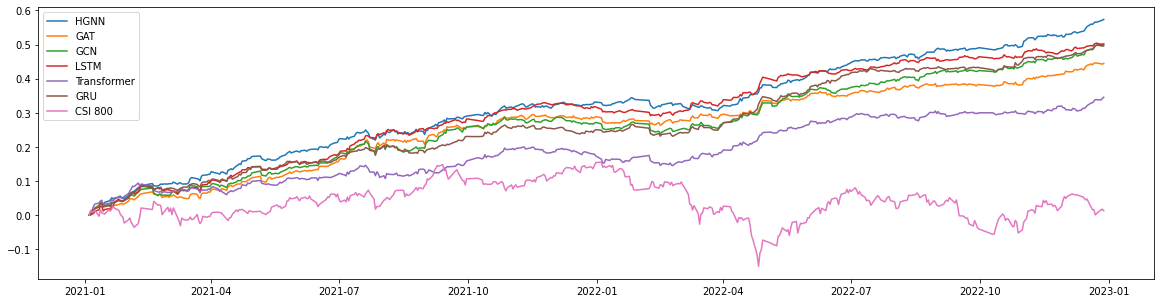

In [5]:
b = BackTest(1000000, 0.001, 0.001)

lstm = pd.read_csv("/home/chencheng/lstm_800/info_20210101_20221231.csv", index_col=0)
ret_lstm = b.get_daily_pnl(lstm, 0.1)
ret_lstm.index = pd.to_datetime(ret_lstm.index, format="%Y%m%d")


gru = pd.read_csv("/home/chencheng/gru_800/info_20210101_20221231.csv", index_col=0)
ret_gru = b.get_daily_pnl(gru, 0.1)
ret_gru.index = pd.to_datetime(ret_gru.index, format="%Y%m%d")


ts = pd.read_csv("/home/chencheng/transformer_800/info_20210101_20221231.csv", index_col=0)
ret_ts = b.get_daily_pnl(ts, 0.1)
ret_ts.index = pd.to_datetime(ret_ts.index, format="%Y%m%d")

gcn = pd.read_csv("/home/chencheng/gcn_800/info_20210101_20221231.csv", index_col=0)
ret_gcn = b.get_daily_pnl(gcn, 0.1)
ret_gcn.index = pd.to_datetime(ret_gcn.index, format="%Y%m%d")

tgc = pd.read_csv("/home/chencheng/gat_800/info_20210101_20221231.csv", index_col=0)
ret_tgc = b.get_daily_pnl(tgc, 0.1)
ret_tgc.index = pd.to_datetime(ret_tgc.index, format="%Y%m%d")

hats = pd.read_csv("/home/chencheng/hgnn_800/info_20210101_20221231.csv", index_col=0)
ret_hats = b.get_daily_pnl(hats, 0.1)
ret_hats.index = pd.to_datetime(ret_hats.index, format="%Y%m%d")


zz800 = gru.groupby("date")["ret"].mean().shift(1).fillna(0)
zz800.index = pd.to_datetime(zz800.index, format="%Y%m%d")

plot_net_value([ret_hats, ret_tgc, ret_gcn, ret_lstm, ret_ts, ret_gru, zz800], ["HGNN", "GAT", "GCN", "LSTM", "Transformer", "GRU", "CSI 800"])